# Registration of NAIP 2019 to Sentinel-2 ARD

### Import Packages

In [1]:
# Import packages

from pathlib import Path
from arosics import COREG, COREG_LOCAL, DESHIFTER
from geoarray import GeoArray
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

### Path Setup

In [2]:
# Set the working directory

wd = Path('/media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027')
assert wd.exists()

### Load the Reference Image for testing

In [3]:
# Select and the image/title of interest from Sentinel-2

basemap_file = wd/'2016-2022_182-243_HL_TSA_SEN2L_RED_FBY.tif' #This is the average RED band for the groing period of 2019
reference = GeoArray(str(basemap_file))

# Plot raster
#reference.show(figsize = (15, 15))

### Load Target Image for testing

Automatically detected nodata value for GeoArray 'n01': 0.0
Note: array has been downsampled to 740 x 1000 for faster visualization.


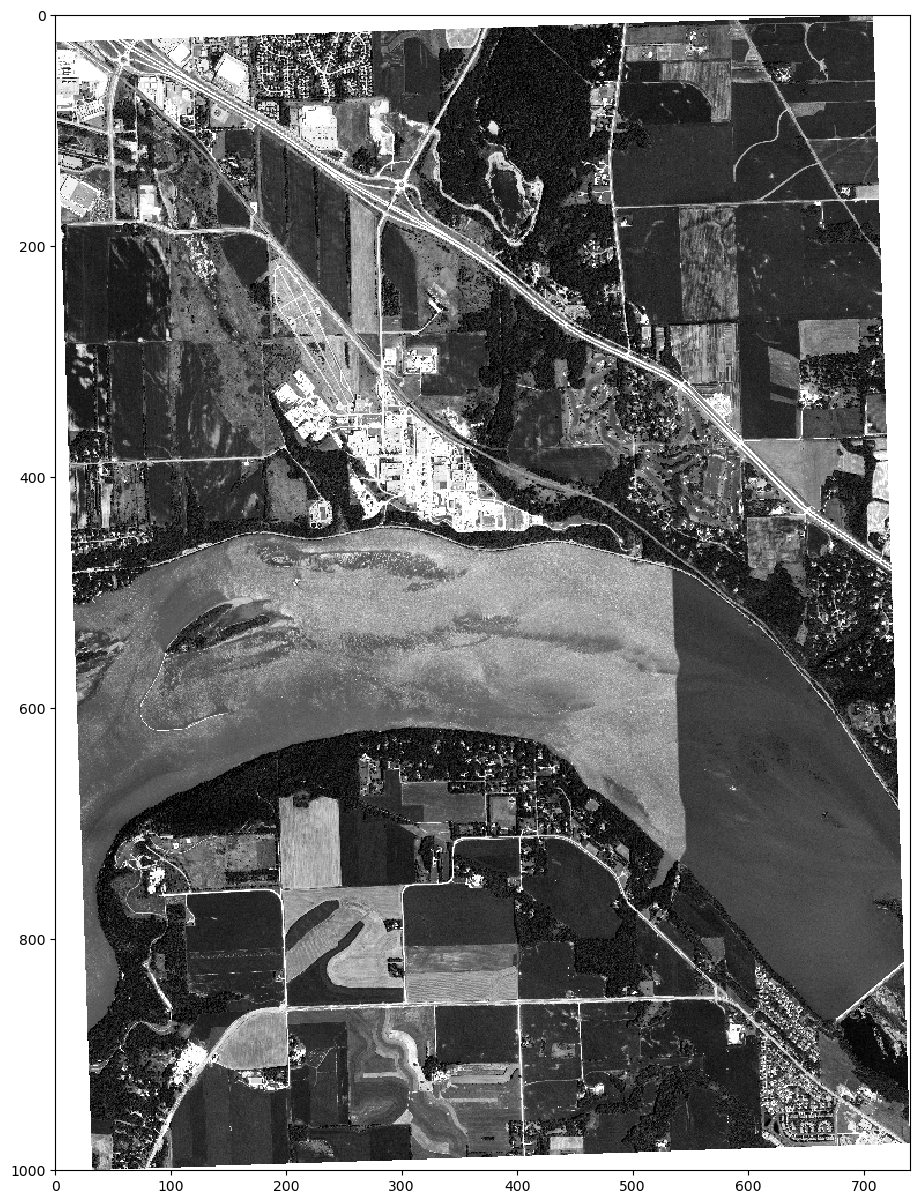

In [4]:
# Select and the image/title of interest from NAIP 2019

target_file = wd/'projected/n01.tif' #This is the NAIP scene of 2019 for the title of interest
target = GeoArray(str(target_file))

# Plot raster
target.show(figsize = (15, 15))

### Coregistration to a Basemap Image

In [5]:
# Sometimes the projections does not match. Let's force them to be the same regardless if they are equal.
if reference.projection == target.projection:
    reference.projection = target.projection
else:
    print("Stop, you need to check the projection to continue")    

In [6]:
# Setup parameters for tiepoint detection and affine transformation factor calculation, test which work better!
coreg_kwargs = {
    'grid_res': 200, # Tie point spacing in x-direction, in terms of target image pixels
    'window_size': (200, 200), # Size of matching window
    'nodata': (-9999, 0), # No-data values for reference & target images
    'max_iter': 99,
    'r_b4match': 4, # Reference band for matching (2019 red band)
    's_b4match': 1, # Target band for matching (red band NAIP)
    'CPUs': 28,      # For Ubuntu only
    'max_shift': 5,
    'min_reliability': 80
}

# Apply local image coregistration
CRL = COREG_LOCAL(reference, target, **coreg_kwargs)

# Inspect the result
CRL.correct_shifts()

Polygonize progress     |================----------------------------------| 32.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(241852.527600453, 639985.6702168239, 247613.10268934674, 647766.4365695762)
Matching window position (X,Y): 244746.7072736544/643027.9900819869
Initializing tie points grid...


Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2277 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:12


Found 2061 matches.
Performing validity checks...
790 tie points flagged by level 1 filtering (reliability).
29 tie points flagged by level 2 filtering (SSIM).
102 tie points flagged by level 3 filtering (RANSAC)
1164 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n01 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999974053633729/0.5999974053633729; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['lcc',
               1.0,
               1.0,
               241852.527600453,
               647766.4365695762,
               0.5999974053702317,
               0.5999974053120241,
               'NAD83']),
             ('updated geotransform',
              (241852.527600453,
               0.5999974053702317,
               0.0,
               647766.4365695762,
               0.0,
               -0.5999974053120241)),
             ('updated projection',
              'PROJCS["USA_Contiguous_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origi

In [8]:
with np.errstate(over = 'ignore', divide = 'ignore', invalid = 'ignore'): # Ignore AROSICS complaining
    result = CRL.correct_shifts()

/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n01 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999974053633729/0.5999974053633729; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "


Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Note: array has been downsampled to 740 x 1000 for faster visualization.


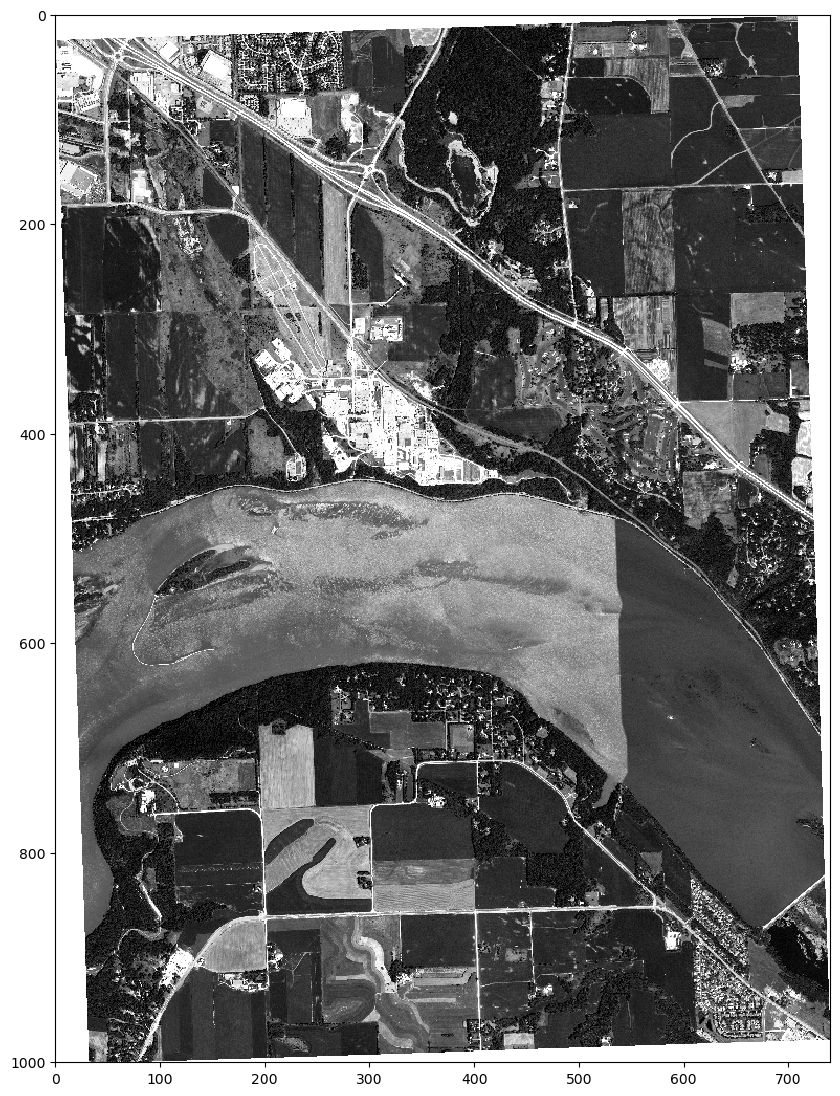

/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/py_tools_ds/geo/projection.py:169: RuntimeWarning: Could not find a suitable EPSG code for the input WKT string.
  warnings.warn('Could not find a suitable EPSG code for the input WKT string.', RuntimeWarning)


Note: array has been downsampled to 740 x 1000 for faster visualization.


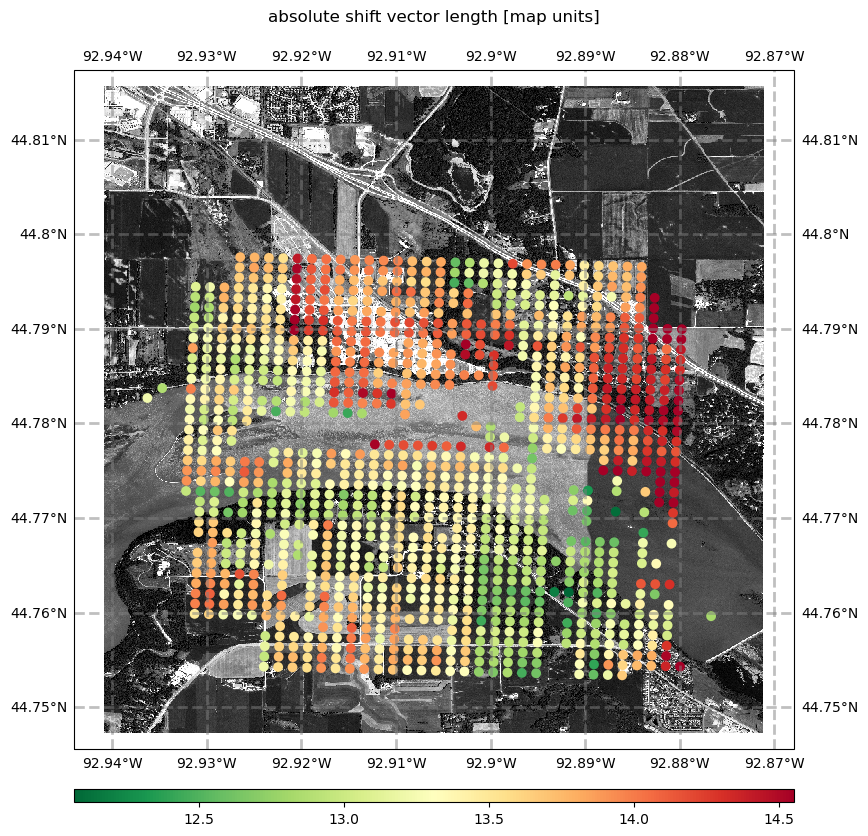

In [9]:
# Show the corrected target image geoarray
result['GeoArray_shifted'].show(figsize = (10, 15))

# Show tie points on top of the target image
CRL.view_CoRegPoints()

### Applying Calculated Shifts on the test image

In [83]:
# Apply previously-calculated shifts to the full-band image
deshifter = DESHIFTER(target, CRL.coreg_info)

# Warp the full-band image "with the cubic convolution resampling"
target_shifted_all_bands = deshifter.correct_shifts()

# Get shifted GeoArray
target_geoarray_shifted_all_bands = target_shifted_all_bands['GeoArray_shifted']

# Set file path to shifted image
target_file_shifted_all_bands = wd/('corg_naip_2019.tif') #Export for testing

# Save the shifted image into GTiff, use this image for manual assessment.
target_geoarray_shifted_all_bands.save(str(target_file_shifted_all_bands),
                                       fmt = 'GTiff')

# Visual inspect if the resulting coregistration works!

Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:21


Writing GeoArray of size (12852, 18364, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/corg_naip_2021.tif.


### Apply shifts in a batch

In [10]:
# If the corrections works you can apply the same procedure to a given image it in a batch. If not, do it one by one.

# Select the forlder for processing in a batch.
in_wd = wd/'projected'

# Select output path
out_wd = wd/'coregistered'

# List images to transform 
files = os.listdir(in_wd)
files

['n010.tif',
 'n011.tif',
 'n02.tif',
 'n01.tif',
 'n05.tif',
 'n013.tif',
 'n012.tif',
 'n07.tif',
 'n04.tif',
 'n09.tif',
 'n06.tif',
 'n03.tif',
 'n08.tif']

In [11]:
# Apply correctiton in batch

for file in files:
    int_file = in_wd/file
    out_file = out_wd/file
      
    #Read
    scene = GeoArray(str(int_file))
    
    # Apply local image coregistration
    CRL = COREG_LOCAL(reference, scene, **coreg_kwargs)
    
    with np.errstate(over = 'ignore', divide = 'ignore', invalid = 'ignore'): # Ignore AROSICS complaining
        result = CRL.correct_shifts()
    
    # Apply shifts
    deshifter = DESHIFTER(scene, CRL.coreg_info)

    # Warp the full-band image "with the nearest resampling"
    target_shifted_all_bands = deshifter.correct_shifts()

    # Get shifted GeoArray
    target_geoarray_shifted_all_bands = target_shifted_all_bands['GeoArray_shifted']

    # Save the shifted image into ENVI *.hdr format with metada
    target_geoarray_shifted_all_bands.save(str(out_file), fmt = 'GTiff')

Polygonize progress     |======================----------------------------| 43.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(231968.33799249728, 639657.031808939, 237724.41945890544, 647434.6838804486)
Matching window position (X,Y): 234855.70559313626/642863.7709020242
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2365 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:13
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/Tie_Point_Grid.py:1101: UserWarning: More than 70% of the found tie points have a reliability lower than 80% and are therefore marked as false-positives. Consider relaxing the minimum reliability (parameter 'min_reliability') to avoid that. For example min_reliability=69 would only flag 40% of the tie points in case of your input data.
  warnings.warn(r"More than 70%% of the found tie points have a reliability lower than %s%% and are "


Found 2066 matches.
Performing validity checks...
1724 tie points flagged by level 1 filtering (reliability).
27 tie points flagged by level 2 filtering (SSIM).
34 tie points flagged by level 3 filtering (RANSAC)
308 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n010 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999977655735205/0.5999977655735205; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Automatically detected nodata value for GeoArray 'n010': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Writing GeoArray of size (12963, 9594, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n010.tif.


Polygonize progress     |==================--------------------------------| 35.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(232195.1096158743, 632774.5334623003, 237951.3675780616, 640440.6865937073)
Matching window position (X,Y): 235073.577742815/636607.5929093475
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2860 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:17
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/Tie_Point_Grid.py:1101: UserWarning: More than 70% of the found tie points have a reliability lower than 80% and are therefore marked as false-positives. Consider relaxing the minimum reliability (parameter 'min_reliability') to avoid that. For example min_reliability=73 would only flag 40% of the tie points in case of your input data.
  warnings.warn(r"More than 70%% of the found tie points have a reliability lower than %s%% and are "


Found 2483 matches.
Performing validity checks...
1833 tie points flagged by level 1 filtering (reliability).
30 tie points flagged by level 2 filtering (SSIM).
73 tie points flagged by level 3 filtering (RANSAC)
577 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n011 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999302443319497/0.5999302443319497; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Automatically detected nodata value for GeoArray 'n011': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Writing GeoArray of size (12779, 9595, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n011.tif.


Polygonize progress     |==================--------------------------------| 37.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(236873.9426914867, 639819.0520491762, 242707.68260019334, 647599.056275628)
Matching window position (X,Y): 239802.21040678746/642945.3928057243
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2360 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:13


Found 2100 matches.
Performing validity checks...
1098 tie points flagged by level 1 filtering (reliability).
25 tie points flagged by level 2 filtering (SSIM).
103 tie points flagged by level 3 filtering (RANSAC)
899 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n02 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999977634219628/0.5999977634219628; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n02': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12967, 9724, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n02.tif.


Polygonize progress     |=======================---------------------------| 45.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(241852.527600453, 639985.6702168239, 247613.10268934674, 647766.4365695762)
Matching window position (X,Y): 244746.7072736544/643027.9900819869
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2277 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:12


Found 2061 matches.
Performing validity checks...
790 tie points flagged by level 1 filtering (reliability).
29 tie points flagged by level 2 filtering (SSIM).
103 tie points flagged by level 3 filtering (RANSAC)
1163 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n01 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999974053633729/0.5999974053633729; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n01': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12968, 9601, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n01.tif.


Polygonize progress     |===============-----------------------------------| 30.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(242320.54588028762, 626110.5663400675, 248089.7248574593, 633890.1915193693)
Matching window position (X,Y): 245205.39381257232/630000.5162200846
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2912 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:19


Found 2542 matches.
Performing validity checks...
1160 tie points flagged by level 1 filtering (reliability).
72 tie points flagged by level 2 filtering (SSIM).
118 tie points flagged by level 3 filtering (RANSAC)
1262 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n05 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.599863148993885/0.599863148993885; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n05': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12969, 9618, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n05.tif.


Polygonize progress     |===============-----------------------------------| 30.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(227422.978687889, 625618.277707995, 233273.79336698967, 633401.5021187721)
Matching window position (X,Y): 231220.9917161287/629497.3775308691
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2042 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:11
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/Tie_Point_Grid.py:1101: UserWarning: More than 70% of the found tie points have a reliability lower than 80% and are therefore marked as false-positives. Consider relaxing the minimum reliability (parameter 'min_reliability') to avoid that. For example min_reliability=52 would only flag 40% of the tie points in case of your input data.
  warnings.warn(r"More than 70%% of the found tie points have a reliability lower than %s%% and are "
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n013 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5998631530464043/0.5998631530464043; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you d

Found 1543 matches.
Performing validity checks...
1351 tie points flagged by level 1 filtering (reliability).
81 tie points flagged by level 2 filtering (SSIM).
23 tie points flagged by level 3 filtering (RANSAC)
169 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Automatically detected nodata value for GeoArray 'n013': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Writing GeoArray of size (12975, 9754, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n013.tif.


Polygonize progress     |====================------------------------------| 39.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(232417.59700394043, 625781.7736794191, 238182.50854382117, 633557.8044067178)
Matching window position (X,Y): 235300.26670388447/629669.8976509072
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2906 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:18
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/Tie_Point_Grid.py:1101: UserWarning: More than 70% of the found tie points have a reliability lower than 80% and are therefore marked as false-positives. Consider relaxing the minimum reliability (parameter 'min_reliability') to avoid that. For example min_reliability=58 would only flag 40% of the tie points in case of your input data.
  warnings.warn(r"More than 70%% of the found tie points have a reliability lower than %s%% and are "
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n012 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5998635136387135/0.5998635136387135; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you d

Found 2342 matches.
Performing validity checks...
2060 tie points flagged by level 1 filtering (reliability).
43 tie points flagged by level 2 filtering (SSIM).
23 tie points flagged by level 3 filtering (RANSAC)
259 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Automatically detected nodata value for GeoArray 'n012': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Writing GeoArray of size (12963, 9611, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n012.tif.


Polygonize progress     |====================------------------------------| 39.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(252218.18893117202, 626451.226739097, 257997.2530105015, 634237.8104397329)
Matching window position (X,Y): 255107.96314304086/630344.49620384
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2919 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:18
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/Tie_Point_Grid.py:1101: UserWarning: More than 70% of the found tie points have a reliability lower than 80% and are therefore marked as false-positives. Consider relaxing the minimum reliability (parameter 'min_reliability') to avoid that. For example min_reliability=66 would only flag 40% of the tie points in case of your input data.
  warnings.warn(r"More than 70%% of the found tie points have a reliability lower than %s%% and are "
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n07 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.599861332710141/0.599861332710141; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´

Found 2520 matches.
Performing validity checks...
2059 tie points flagged by level 1 filtering (reliability).
94 tie points flagged by level 2 filtering (SSIM).
44 tie points flagged by level 3 filtering (RANSAC)
417 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Automatically detected nodata value for GeoArray 'n07': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:03


Writing GeoArray of size (12981, 9634, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n07.tif.


Polygonize progress     |====================------------------------------| 40.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(237104.9515309909, 632937.0105828361, 242939.5137086554, 640605.2206331888)
Matching window position (X,Y): 240022.70352664113/636771.0347787504
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2901 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:17
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n04 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999302421637237/0.5999302421637237; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "


Found 2569 matches.
Performing validity checks...
1271 tie points flagged by level 1 filtering (reliability).
30 tie points flagged by level 2 filtering (SSIM).
127 tie points flagged by level 3 filtering (RANSAC)
1171 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n04': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12782, 9726, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n04.tif.


Polygonize progress     |====================------------------------------| 40.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(247470.21377697535, 619397.3557097167, 253324.82717683716, 627071.1518205488)
Matching window position (X,Y): 250397.65185376437/623234.2907851926
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2915 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:16
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n09 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.599796475756769/0.599796475756769; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "


Found 2567 matches.
Performing validity checks...
1724 tie points flagged by level 1 filtering (reliability).
52 tie points flagged by level 2 filtering (SSIM).
91 tie points flagged by level 3 filtering (RANSAC)
750 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n09': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12794, 9761, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n09.tif.


Polygonize progress     |=================---------------------------------| 33.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(246993.13755944886, 633270.345216058, 252838.03833255632, 640945.4928148369)
Matching window position (X,Y): 249915.814758931/637107.9722580338
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2909 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:17


Found 2567 matches.
Performing validity checks...
1283 tie points flagged by level 1 filtering (reliability).
37 tie points flagged by level 2 filtering (SSIM).
114 tie points flagged by level 3 filtering (RANSAC)
1168 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n06 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999291538611122/0.5999291538611122; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n06': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12794, 9743, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n06.tif.


Polygonize progress     |==================--------------------------------| 35.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(242088.38459137123, 633102.6627385115, 247850.11113490895, 640772.1662925084)
Matching window position (X,Y): 244969.3260064515/636937.6073514569
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2864 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:17


Found 2574 matches.
Performing validity checks...
1496 tie points flagged by level 1 filtering (reliability).
34 tie points flagged by level 2 filtering (SSIM).
123 tie points flagged by level 3 filtering (RANSAC)
951 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n03 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.5999298775028857/0.5999298775028857; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n03': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12784, 9604, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n03.tif.


Polygonize progress     |======================----------------------------| 43.0% Complete  => 0:00:00

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(229292.51690292917, 615980.1870542851, 259292.51690292917, 645980.1870542851)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(247230.15016983877, 626277.4921264078, 253083.2847043484, 634063.7063499641)
Matching window position (X,Y): 250157.04037500278/630170.7595908914
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2956 points) using 28 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:00:18


Found 2602 matches.
Performing validity checks...
1627 tie points flagged by level 1 filtering (reliability).
57 tie points flagged by level 2 filtering (SSIM).
109 tie points flagged by level 3 filtering (RANSAC)
863 valid tie points remain after filtering.
Correcting geometric shifts...


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of n08 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.599862420921136/0.599862420921136; desired [X/Y]: 10.0/10.0). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Automatically detected nodata value for GeoArray 'n08': 0.0
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:04


Writing GeoArray of size (12980, 9758, 4) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2019/X0017_Y0027/coregistered/n08.tif.
